# **Decision Tree Classification**

[**Decision Trees**](https://scikit-learn.org/stable/modules/tree.html)

[**sklearn.tree.DecisionTreeClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [11]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Dataset.
""" https://www.kaggle.com/datasets/d4rklucif3r/social-network-ads """
dataset = pd.read_csv("Social_Network_Ads.csv")
print(dataset.head())

# Split the dataset into features and target values.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and test set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Feature Scaling.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Decision Tree Model.
clf = DecisionTreeClassifier(criterion="entropy", random_state=42).fit(X_train, y_train)

# Predicting Test set Results.
y_pred = clf.predict(X_test)

# Predicting New Results.
print("Prediction of New Result is ", clf.predict(sc.transform([[30, 87000]])))

# Predictions and Evaluations.
print("Confusion Matrix is \n", confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Prediction of New Result is  [0]
Confusion Matrix is 
 [[55  8]
 [ 9 28]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



### **Tree Visualization.**

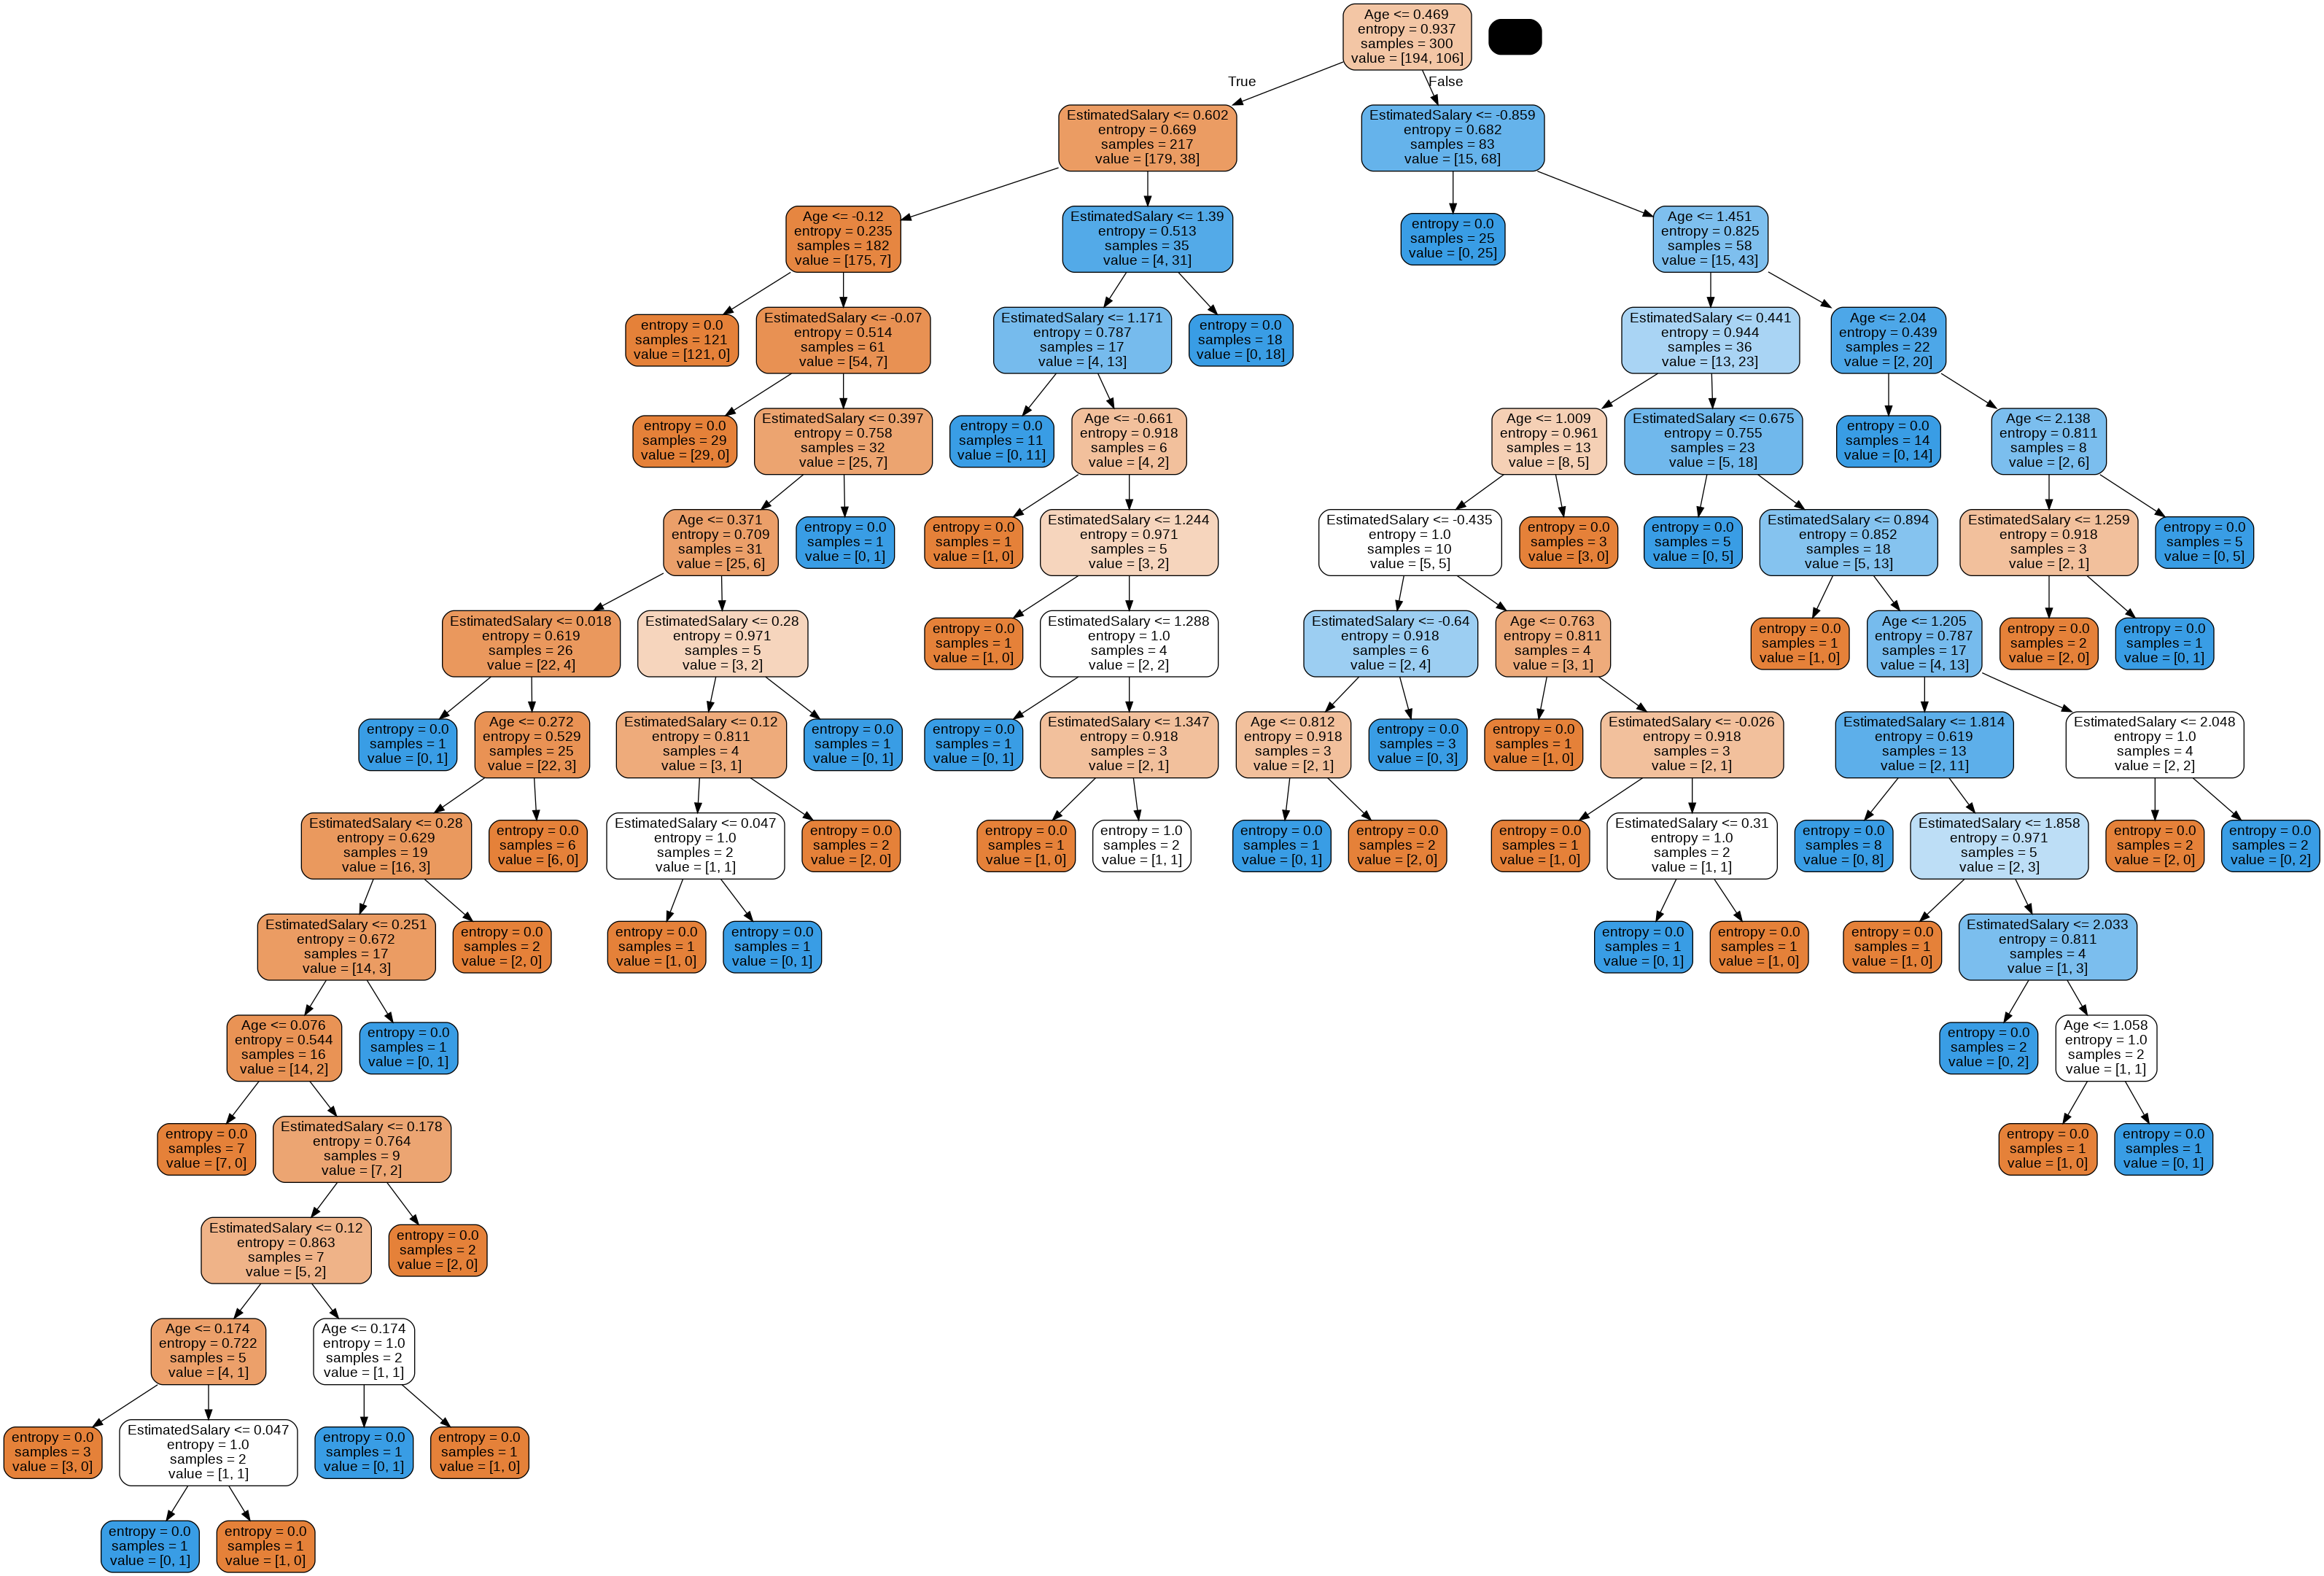

In [12]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(dataset.columns[:-1])

dot_data = StringIO()
export_graphviz(
    clf, out_file=dot_data, feature_names=features, filled=True, rounded=True
)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# **Post Pruning Decision Trees with Cost Complexity Pruning.**

The **DecisionTreeClassifier** provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In **DecisionTreeClassifier**, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

Accuracy is  0.951048951048951


[Text(0.625, 0.9375, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.4318181818181818, 0.8125, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.3181818181818182, 0.6875, 'X[13] <= 48.7\ngini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.22727272727272727, 0.5625, 'X[24] <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.18181818181818182, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 245\nvalue = [2, 243]'),
 Text(0.09090909090909091, 0.3125, 'X[21] <= 26.89\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 239\nvalue = [1, 238]'),
 Text(0.22727272727272727, 0.1875, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(0.3181818181818182, 0.1875, 'X[21] <= 33.56\ngini = 0.133\nsample

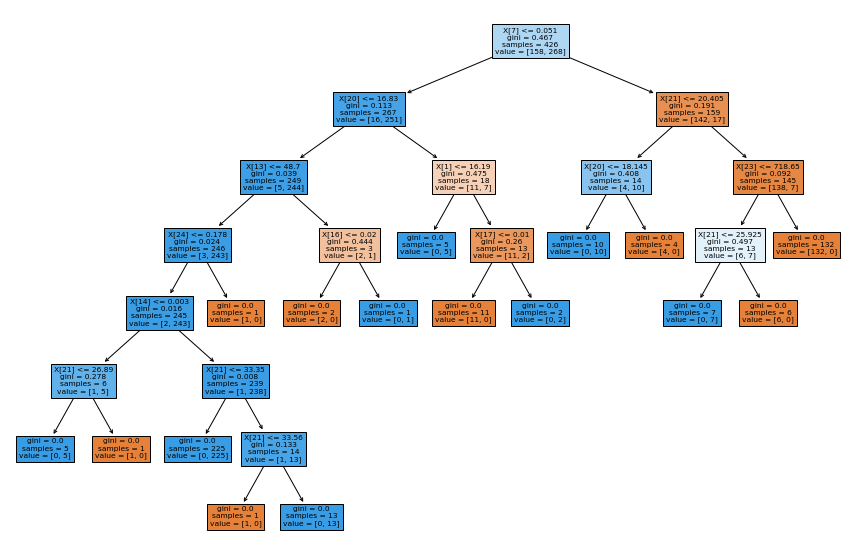

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn import tree

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy is ", accuracy_score(y_test, y_pred))

# Visualizing the Tree.
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)

In [14]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3247674769665928


### **Accuracy vs Alpha for training and testing sets.**

When `ccp_alpha` is set to zero and keeping the other default parameters of **DecisionTreeClassifier**, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As **alpha** increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha` = 0.015 maximizes the testing accuracy.

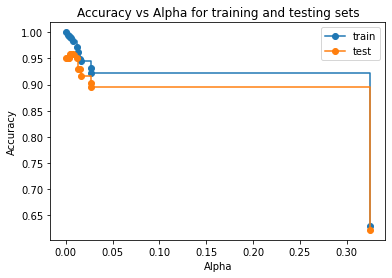

In [15]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Accuracy is  0.9300699300699301


[Text(0.4444444444444444, 0.9, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.2222222222222222, 0.7, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.1111111111111111, 0.5, 'gini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.6666666666666666, 0.7, 'X[21] <= 20.405\ngini = 0.191\nsamples = 159\nvalue = [142, 17]'),
 Text(0.5555555555555556, 0.5, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.7777777777777778, 0.5, 'X[23] <= 718.65\ngini = 0.092\nsamples = 145\nvalue = [138, 7]'),
 Text(0.6666666666666666, 0.3, 'X[21] <= 25.925\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 132\nvalue = [132, 0]')]

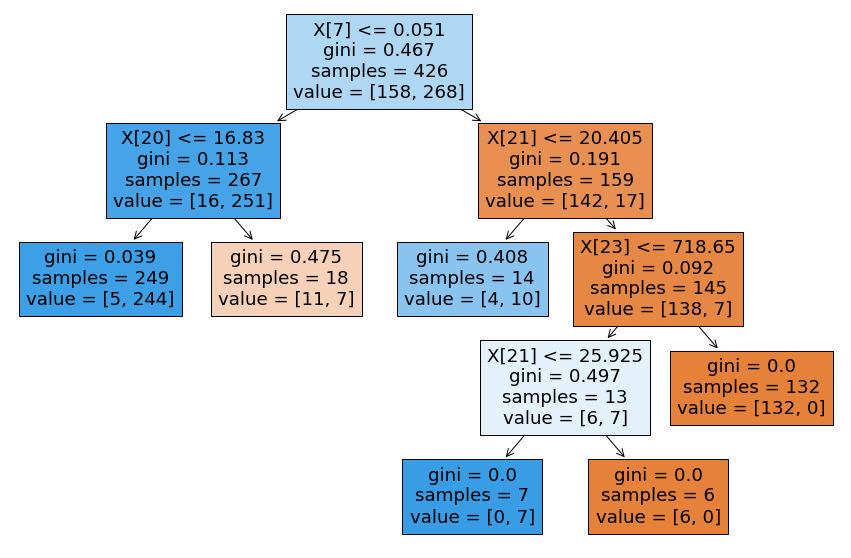

In [16]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.015).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test, y_pred))

# Visualizing the Tree.
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)